##### Imports

In [1]:
from os import path

import pandas as pd
import numpy as np
import h5py

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from tqdm.keras import TqdmCallback

import wandb
from wandb.keras import WandbCallback

from model_parts import get_res_model, modify_model
from data_io import get_data
from utils import save_predictions, compute_metrics, display_result

In [2]:
%load_ext autoreload
%autoreload 2

### Load data

In [3]:
X_train_mit, y_train_mit, X_test_mit, y_test_mit = get_data(dataset='mitbih')

In [4]:
X_train_pt, y_train_pt, X_test_pt, y_test_pt = get_data(dataset='ptbdb')

# Full Training

## MITBIH

#### W&B setup

In [5]:
run = wandb.init(
    project='ML4HC-project4',
    config={
        'learning_rate': 1e-3,
        'schedule_lr': False,
        'epochs': 32,
        'batch_size': 32,
        'num_filters': [128, 128, 256],
        'num_blocks_list': [2, 4, 2],
        'loss_function': 'sparse_categorical_crossentropy',
        'architecture': 'ResCNN',
        'dataset': 'MITBIH',
        'mode': 'training',
        'ndim': 256
    })

config_mit = wandb.config

wandb: Currently logged in as: anej (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.31 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [6]:
original_model = get_res_model(config_mit, nclass=5)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 187, 1)]     0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 187, 1)       4           input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 187, 128)     768         batch_normalization[0][0]        
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 187, 128)     512         conv1d[0][0]                     
______________________________________________________________________________________________

In [7]:
file_path_mit = './models/res/res_cnn_mitbih.h5'

checkpoint = ModelCheckpoint(
    file_path_mit, monitor='val_acc', verbose=1,
    save_best_only=True, mode='max')
early = EarlyStopping(
    monitor='val_acc', mode='max', patience=5, verbose=1)
redonplat = ReduceLROnPlateau(
    monitor='val_acc', mode='max', patience=3, verbose=2)

#### Training

In [8]:
history = original_model.fit(
    X_train_mit, y_train_mit,
    epochs=config_mit.epochs,
    batch_size=config_mit.batch_size,
    verbose=0,
    callbacks=[
        checkpoint, early, redonplat,
        WandbCallback(), TqdmCallback(verbose=1)],
    validation_split=0.1)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]


Epoch 00001: val_acc improved from -inf to 0.95729, saving model to ./models/res/res_cnn_mitbih.h5

Epoch 00002: val_acc improved from 0.95729 to 0.97019, saving model to ./models/res/res_cnn_mitbih.h5

Epoch 00003: val_acc improved from 0.97019 to 0.97225, saving model to ./models/res/res_cnn_mitbih.h5

Epoch 00004: val_acc improved from 0.97225 to 0.98070, saving model to ./models/res/res_cnn_mitbih.h5

Epoch 00005: val_acc did not improve from 0.98070

Epoch 00006: val_acc did not improve from 0.98070

Epoch 00007: val_acc improved from 0.98070 to 0.98184, saving model to ./models/res/res_cnn_mitbih.h5

Epoch 00008: val_acc improved from 0.98184 to 0.98481, saving model to ./models/res/res_cnn_mitbih.h5

Epoch 00009: val_acc improved from 0.98481 to 0.98561, saving model to ./models/res/res_cnn_mitbih.h5

Epoch 00010: val_acc improved from 0.98561 to 0.98675, saving model to ./models/res/res_cnn_mitbih.h5

Epoch 00011: val_acc did not improve from 0.98675

Epoch 00012: val_acc impr

In [8]:
original_model.load_weights(file_path_mit)


### Evaluation

In [9]:
test_preds_mit = np.argmax(original_model.predict(X_test_mit, batch_size=512), axis=1)

r = compute_metrics(y_test_mit, test_preds_mit)

f1_weighted = r['f1-weighted']
f1_macro = r['f1-macro']
acc = r['accuracy']
b_acc = r['balanced_accuracy']

wandb.log({'Test Accuracy': acc})
wandb.log({'Test F1 Weighted': f1_weighted})
wandb.log({'Test F1 Macro': f1_macro})
wandb.log({'Test Balanced Accuracy': b_acc})

f1 score micro:           0.98968
f1 score macro:           0.93962
f1 score weighted:        0.98953
accuracy score:           0.98968
balanced accuracy score:  0.92825


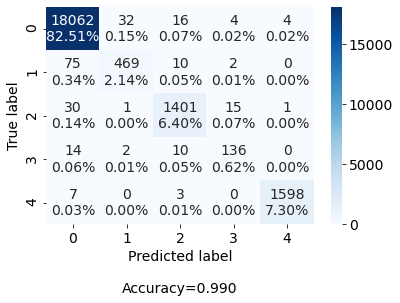

In [10]:
display_result(y_test_mit, test_preds_mit)

In [11]:
run.join()

Test Accuracy,0.98968
_runtime,40
_timestamp,1622839001
_step,3
Test F1 Weighted,0.98953
Test F1 Macro,0.93962
Test Balanced Accuracy,0.92825


Test Accuracy,▁
_runtime,▁▁▁▁
_timestamp,▁▁▁▁
_step,▁▃▆█
Test F1 Weighted,▁
Test F1 Macro,▁
Test Balanced Accuracy,▁


### Predictions

In [12]:
save_predictions(original_model, X_test_mit, 'res_cnn', 'test_mitbih')
save_predictions(original_model, X_train_mit, 'res_cnn', 'train_mitbih')

## PTBDB

#### W&B setup

In [13]:
run = wandb.init(
    project='ML4HC-project4',
    config={
        'learning_rate': 1e-3,
        'schedule_lr': False,
        'epochs': 32,
        'batch_size': 32,
        'num_filters': [32, 32, 128],
        'num_blocks_list': [2, 4, 2],
        'loss_function': 'sparse_categorical_crossentropy',
        'architecture': 'ResCNN',
        'dataset': 'PTBDB',
        'mode': 'training',
        'ndim': 128
    })

config_mit = wandb.config

wandb: wandb version 0.10.31 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [14]:
original_model = get_res_model(config_mit, nclass=5)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 187, 1)]     0                                            
__________________________________________________________________________________________________
batch_normalization_30 (BatchNo (None, 187, 1)       4           input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_19 (Conv1D)              (None, 187, 32)      192         batch_normalization_30[0][0]     
__________________________________________________________________________________________________
batch_normalization_31 (BatchNo (None, 187, 32)      128         conv1d_19[0][0]                  
____________________________________________________________________________________________

In [15]:
file_path_pt = './models/res/res_cnn_pt.h5'

checkpoint = ModelCheckpoint(
    file_path_pt, monitor='val_acc', verbose=1,
    save_best_only=True, mode='max')
early = EarlyStopping(
    monitor='val_acc', mode='max', patience=5, verbose=1)
redonplat = ReduceLROnPlateau(
    monitor='val_acc', mode='max', patience=3, verbose=2)

#### Training

In [22]:
history = original_model.fit(
    X_train_pt, y_train_pt,
    epochs=config_mit.epochs,
    batch_size=config_mit.batch_size,
    verbose=0,
    callbacks=[
        checkpoint, early, redonplat,
        WandbCallback(), TqdmCallback(verbose=1)],
    validation_split=0.1)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]


Epoch 00001: val_acc improved from -inf to 0.69957, saving model to ./models/res/res_cnn_pt.h5

Epoch 00002: val_acc improved from 0.69957 to 0.79142, saving model to ./models/res/res_cnn_pt.h5

Epoch 00003: val_acc improved from 0.79142 to 0.95021, saving model to ./models/res/res_cnn_pt.h5

Epoch 00004: val_acc did not improve from 0.95021

Epoch 00005: val_acc improved from 0.95021 to 0.96996, saving model to ./models/res/res_cnn_pt.h5

Epoch 00006: val_acc did not improve from 0.96996

Epoch 00007: val_acc did not improve from 0.96996

Epoch 00008: val_acc did not improve from 0.96996

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00009: val_acc improved from 0.96996 to 0.98455, saving model to ./models/res/res_cnn_pt.h5

Epoch 00010: val_acc improved from 0.98455 to 0.98627, saving model to ./models/res/res_cnn_pt.h5

Epoch 00011: val_acc did not improve from 0.98627

Epoch 00012: val_acc did not improve from 0.98627

Epoch 00013: val_acc

In [16]:
original_model.load_weights(file_path_pt)

### Evaluation

In [28]:
raw_preds = original_model.predict(X_test_pt, batch_size=512)
test_preds_pt = np.argmax(raw_preds, axis=1)

r = compute_metrics(y_test_pt, test_preds_pt)

f1_weighted = r['f1-weighted']
f1_macro = r['f1-macro']
acc = r['accuracy']
b_acc = r['balanced_accuracy']

wandb.log({'Test Accuracy': acc})
wandb.log({'Test F1 Weighted': f1_weighted})
wandb.log({'Test F1 Macro': f1_macro})
wandb.log({'Test Balanced Accuracy': b_acc})

f1 score micro:           0.99141
f1 score macro:           0.98924
f1 score weighted:        0.99139
accuracy score:           0.99141
balanced accuracy score:  0.98645
AuPR score:               0.99949
AuROC score:              0.99869


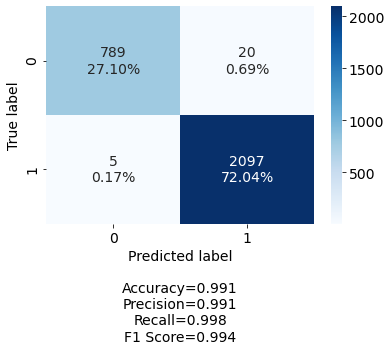

In [29]:
display_result(y_test_pt, test_preds_pt, True, raw_preds[:, 1])

In [19]:
run.join()

Test Accuracy,0.99141
_runtime,38
_timestamp,1622839215
_step,3
Test F1 Weighted,0.99139
Test F1 Macro,0.98924
Test Balanced Accuracy,0.98645


Test Accuracy,▁
_runtime,▁▁▁▁
_timestamp,▁▁▁▁
_step,▁▃▆█
Test F1 Weighted,▁
Test F1 Macro,▁
Test Balanced Accuracy,▁


### Predictions

In [30]:
save_predictions(original_model, X_test_pt, 'res_cnn', 'test_ptb')
save_predictions(original_model, X_train_pt, 'res_cnn', 'train_ptb')

# PTBDB Transfer Learning


## Frozen

### Define model

#### W&B setup

In [31]:
run = wandb.init(
    project='ML4HC-project4',
    config={
        'learning_rate': 1e-3,
        'schedule_lr': False,
        'epochs': 32,
        'batch_size': 32,
        'num_filters': [128, 128, 256],
        'num_blocks_list': [2, 4, 2],
        'loss_function': 'sparse_categorical_crossentropy',
        'architecture': 'ResCNN',
        'dataset': 'PTBDB',
        'mode': 'frozen',
        'ndim': 256
    })

config_pt_frozen = wandb.config

#### Set-up model

In [36]:
pretrained_model = get_res_model(
    nclass=5, prepare_model=False, config=config_pt_frozen)

In [33]:
file_path_pt_frozen = './models/res/res_cnn_pt_frozen.h5'

checkpoint = ModelCheckpoint(
    file_path_pt_frozen, monitor='val_acc', verbose=1,
    save_best_only=True, mode='max')
early = EarlyStopping(
    monitor='val_acc', mode='max', patience=5, verbose=1)
redonplat = ReduceLROnPlateau(
    monitor='val_acc', mode='max', patience=3, verbose=2)

#### Initialize model

In [30]:
pretrained_model.load_weights(file_path_mit)

#### Modify the model

In [37]:
fine_tuned_model = modify_model(pretrained_model, config_pt_frozen)

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 187, 1)]     0                                            
__________________________________________________________________________________________________
batch_normalization_92 (BatchNo (None, 187, 1)       4           input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_57 (Conv1D)              (None, 187, 128)     768         batch_normalization_92[0][0]     
__________________________________________________________________________________________________
batch_normalization_93 (BatchNo (None, 187, 128)     512         conv1d_57[0][0]                  
____________________________________________________________________________________________

#### Train model

In [32]:
fine_tuned_model.fit(
    X_train_pt, y_train_pt,
    epochs=config_pt_frozen.epochs,
    batch_size=config_pt_frozen.batch_size,
    verbose=0,
    callbacks=[
        checkpoint, early, redonplat,
        WandbCallback(), TqdmCallback(verbose=1)],
    validation_split=0.1)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]


Epoch 00001: val_acc improved from -inf to 0.96824, saving model to ./models/res/res_cnn_pt_frozen.h5

Epoch 00002: val_acc improved from 0.96824 to 0.98112, saving model to ./models/res/res_cnn_pt_frozen.h5

Epoch 00003: val_acc improved from 0.98112 to 0.98455, saving model to ./models/res/res_cnn_pt_frozen.h5

Epoch 00004: val_acc did not improve from 0.98455

Epoch 00005: val_acc improved from 0.98455 to 0.98884, saving model to ./models/res/res_cnn_pt_frozen.h5

Epoch 00006: val_acc improved from 0.98884 to 0.98970, saving model to ./models/res/res_cnn_pt_frozen.h5

Epoch 00007: val_acc did not improve from 0.98970

Epoch 00008: val_acc did not improve from 0.98970

Epoch 00009: val_acc did not improve from 0.98970

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00010: val_acc improved from 0.98970 to 0.99571, saving model to ./models/res/res_cnn_pt_frozen.h5

Epoch 00011: val_acc did not improve from 0.99571

Epoch 00012: val_acc did not 

In [38]:
fine_tuned_model.load_weights(file_path_pt_frozen)

### Evaluation

In [39]:
raw_preds = original_model.predict(X_test_pt, batch_size=512)
test_preds_pt = np.argmax(raw_preds, axis=1)

r = compute_metrics(y_test_pt, test_preds_pt)

f1_weighted = r['f1-weighted']
f1_macro = r['f1-macro']
acc = r['accuracy']
b_acc = r['balanced_accuracy']

wandb.log({'Test Accuracy': acc})
wandb.log({'Test F1 Weighted': f1_weighted})
wandb.log({'Test F1 Macro': f1_macro})
wandb.log({'Test Balanced Accuracy': b_acc})

f1 score micro:           0.99141
f1 score macro:           0.98924
f1 score weighted:        0.99139
accuracy score:           0.99141
balanced accuracy score:  0.98645
AuPR score:               0.99949
AuROC score:              0.99869


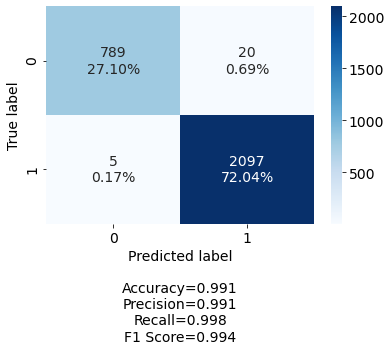

In [41]:
display_result(y_test_pt, test_preds_pt, True, raw_preds[:, 1])

In [36]:
run.join()

epoch,14
loss,0.02013
acc,0.99236
val_loss,0.01467
val_acc,0.99571
lr,1e-05
_runtime,181
_timestamp,1622830078
_step,18
best_val_loss,0.01384
best_epoch,12


epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▅▄▃▂▂▂▂▂▁▁▁▁▁▁
acc,▁▄▅▆▇▇▇▇▇██████
val_loss,█▅▄▅▃▃▃▃▃▁▁▁▁▁▁
val_acc,▁▄▅▄▆▆▅▆▆██████
lr,█████████▂▂▂▂▁▁
_runtime,▁▁▂▂▂▂▃▃▃▄▄▄▄▅▅████
_timestamp,▁▁▂▂▂▂▃▃▃▄▄▄▄▅▅████
_step,▁▁▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇██
Test Accuracy,▁
Test F1 Weighted,▁


### Predictions

In [42]:
save_predictions(fine_tuned_model, X_test_pt, 'res_cnn', 'test_ptb_frozen')
save_predictions(fine_tuned_model, X_train_pt, 'res_cnn', 'train_ptb_frozen')

## Whole Model

### Define model

#### W&B setup

In [43]:
run = wandb.init(
    project='ML4HC-project4',
    config={
        'learning_rate': 1e-3,
        'schedule_lr': False,
        'epochs': 32,
        'batch_size': 32,
        'num_filters': [128, 128, 256],
        'num_blocks_list': [2, 4, 2],
        'loss_function': 'sparse_categorical_crossentropy',
        'architecture': 'ResCNN',
        'dataset': 'PTBDB',
        'mode': 'whole',
        'ndim': 256
    })

config_pt_whole = wandb.config

Test Accuracy,0.99141
_runtime,75
_timestamp,1622839460
_step,3
Test F1 Weighted,0.99139
Test F1 Macro,0.98924
Test Balanced Accuracy,0.98645


Test Accuracy,▁
_runtime,▁▁▁▁
_timestamp,▁▁▁▁
_step,▁▃▆█
Test F1 Weighted,▁
Test F1 Macro,▁
Test Balanced Accuracy,▁


wandb: wandb version 0.10.31 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


#### Set-up model

In [44]:
pretrained_model = get_res_model(
    nclass=5, prepare_model=False, config=config_pt_whole)

In [45]:
file_path_pt_whole = './models/res/res_cnn_pt_whole.h5'

checkpoint = ModelCheckpoint(
    file_path_pt_whole, monitor='val_acc', verbose=1,
    save_best_only=True, mode='max')
early = EarlyStopping(
    monitor='val_acc', mode='max', patience=5, verbose=1)
redonplat = ReduceLROnPlateau(
    monitor='val_acc', mode='max', patience=3, verbose=2)

#### Initialize model

In [46]:
pretrained_model.load_weights(file_path_mit)

#### Modify the model

In [47]:
fine_tuned_model = modify_model(pretrained_model, config_pt_whole)

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 187, 1)]     0                                            
__________________________________________________________________________________________________
batch_normalization_124 (BatchN (None, 187, 1)       4           input_5[0][0]                    
__________________________________________________________________________________________________
conv1d_76 (Conv1D)              (None, 187, 128)     768         batch_normalization_124[0][0]    
__________________________________________________________________________________________________
batch_normalization_125 (BatchN (None, 187, 128)     512         conv1d_76[0][0]                  
____________________________________________________________________________________________

#### Train model

In [43]:
fine_tuned_model.fit(
    X_train_pt, y_train_pt,
    epochs=config_pt_whole.epochs,
    batch_size=config_pt_whole.batch_size,
    verbose=0,
    callbacks=[
        checkpoint, early, redonplat,
        WandbCallback(), TqdmCallback(verbose=1)],
    validation_split=0.1)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]


Epoch 00001: val_acc improved from -inf to 0.96223, saving model to ./models/res/res_cnn_pt_whole.h5

Epoch 00002: val_acc improved from 0.96223 to 0.98283, saving model to ./models/res/res_cnn_pt_whole.h5

Epoch 00003: val_acc improved from 0.98283 to 0.98884, saving model to ./models/res/res_cnn_pt_whole.h5

Epoch 00004: val_acc improved from 0.98884 to 0.99142, saving model to ./models/res/res_cnn_pt_whole.h5

Epoch 00005: val_acc improved from 0.99142 to 0.99399, saving model to ./models/res/res_cnn_pt_whole.h5

Epoch 00006: val_acc improved from 0.99399 to 0.99657, saving model to ./models/res/res_cnn_pt_whole.h5

Epoch 00007: val_acc did not improve from 0.99657

Epoch 00008: val_acc improved from 0.99657 to 0.99742, saving model to ./models/res/res_cnn_pt_whole.h5

Epoch 00009: val_acc did not improve from 0.99742

Epoch 00010: val_acc did not improve from 0.99742

Epoch 00011: val_acc did not improve from 0.99742

Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.0001

In [48]:
fine_tuned_model.load_weights(file_path_pt_whole)

### Evaluation

In [49]:
raw_preds = original_model.predict(X_test_pt, batch_size=512)
test_preds_pt = np.argmax(raw_preds, axis=1)

r = compute_metrics(y_test_pt, test_preds_pt)

f1_weighted = r['f1-weighted']
f1_macro = r['f1-macro']
acc = r['accuracy']
b_acc = r['balanced_accuracy']

wandb.log({'Test Accuracy': acc})
wandb.log({'Test F1 Weighted': f1_weighted})
wandb.log({'Test F1 Macro': f1_macro})
wandb.log({'Test Balanced Accuracy': b_acc})

f1 score micro:           0.99141
f1 score macro:           0.98924
f1 score weighted:        0.99139
accuracy score:           0.99141
balanced accuracy score:  0.98645
AuPR score:               0.99949
AuROC score:              0.99869


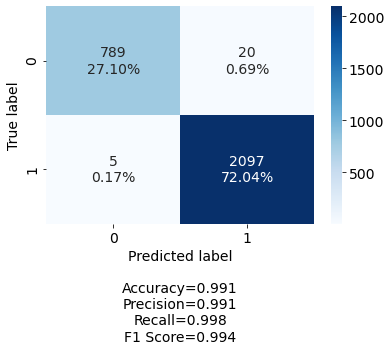

In [50]:
display_result(y_test_pt, test_preds_pt, True, raw_preds[:, 1])

In [46]:
run.join()

epoch,12
loss,0.00239
acc,0.99924
val_loss,0.00417
val_acc,0.99742
lr,0.0001
_runtime,327
_timestamp,1622830467
_step,16
best_val_loss,0.00417
best_epoch,12


epoch,▁▂▂▃▃▄▅▅▆▆▇▇█
loss,█▃▂▂▂▂▂▂▂▁▁▁▁
acc,▁▆▇▇▇▇▇█▇████
val_loss,█▅▃▃▃▂▂▂▃▂▁▁▁
val_acc,▁▅▆▇▇█▇█▇████
lr,███████████▁▁
_runtime,▁▂▂▃▃▄▄▅▅▆▆▇█████
_timestamp,▁▂▂▃▃▄▄▅▅▆▆▇█████
_step,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
Test Accuracy,▁
Test F1 Weighted,▁


### Predictions

In [51]:
save_predictions(fine_tuned_model, X_test_pt, 'res_cnn', 'test_ptb_whole')
save_predictions(fine_tuned_model, X_train_pt, 'res_cnn', 'train_ptb_whole')